In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#################    Read data from CSV file   #################
df=pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 645 missing values in data frame


In [2]:
df=df.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
# 7.This will select float columns only
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106,70,26,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121,81,28,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127,80,25,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150,95,28,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130,84,23,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179,92,25,66,86,1
4234,1,51,3,1,43,0,0,0,0,207,126,80,19,65,68,0
4237,0,52,2,0,0,0,0,0,0,269,133,83,21,80,107,0
4238,1,40,3,0,0,0,0,1,0,185,141,98,25,67,72,0


Feature: 0, Score: 40.882
Feature: 1, Score: 31.698
Feature: 2, Score: 86.531
Feature: 3, Score: 15.082
Feature: 4, Score: 15.144
Feature: 5, Score: 12.609
Feature: 6, Score: 80.277
Feature: 7, Score: 37.268
Feature: 8, Score: 18.497
Feature: 9, Score: 96.825
Feature: 10, Score: 57.623
Feature: 11, Score: 95.211
Feature: 12, Score: 65.373
Feature: 13, Score: 50.988
Feature: 14, Score: 16.029


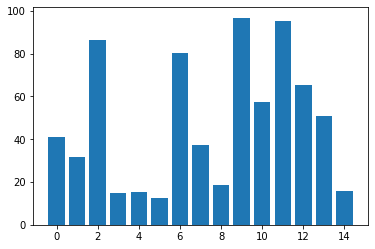

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=3658, n_features=15, n_informative=15, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature selection

In [5]:
# remove the colums with low significant value score, here we have "currentSmoker" Score: 15.082, "cigsPerDay" Score: 15.144,"BPMeds" Score: 12.609 and"glucose" score: 16.02
df=df.drop(['currentSmoker','cigsPerDay','BPMeds','glucose'],axis=1)

In [6]:
##########   Normalizing ############## 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['male', 'age',	'education','prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP','BMI','heartRate' ,	'TenYearCHD'])


In [ ]:
#df_scale.to_csv('framingham_clean.csv')

In [7]:
# Separate the target from the data set
X = df_scale.drop(['TenYearCHD'], axis=1)
y = df_scale['TenYearCHD']

In [8]:
#Split the data to training 70% and testing 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [9]:
############################## The Neural Network Model ##########################################
model = keras.Sequential([ keras.layers.Dense(300, activation=tf.nn.relu, input_shape=(11,)), keras.layers.Dense(1, activation=tf.nn.softmax)])
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.MeanAbsoluteError()])
    #metrics=[tf.keras.metrics.CosineSimilarity(axis=1)])
    #metrics=[tf.keras.metrics.MeanSquaredError()])
history=model.fit(X_train, y_train, batch_size=32, epochs=50)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: %.4f' % test_acc, '\n')

Epoch 1/50
80/80 [==============================] - 0s 965us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 2/50
80/80 [==============================] - 0s 971us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 3/50
80/80 [==============================] - 0s 936us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 5/50
80/80 [==============================] - 0s 971us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 6/50
80/80 [==============================] - 0s 912us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 7/50
80/80 [==============================] - 0s 895us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 8/50
80/80 [==============================] - 0s 929us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epoch 9/50
80/80 [==============================] - 0s 900us/step - loss: 0.8551 - mean_absolute_error: 0.8551
Epo

In [10]:
# Recall, F1-Score, Precision
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit
mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

model = mlp.fit(X_train, y_train)
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.8347    0.9967    0.9085       912
         1.0     0.6667    0.0323    0.0615       186

    accuracy                         0.8333      1098
   macro avg     0.7507    0.5145    0.4850      1098
weighted avg     0.8062    0.8333    0.7651      1098



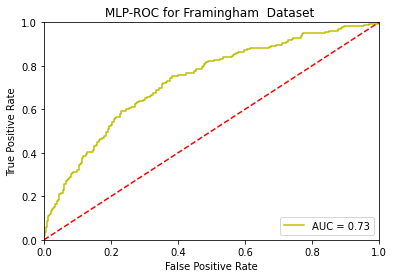

In [13]:
##### ROC ######################
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.neural_network import MLPClassifier

mlp.fit(X_train, y_train)
probs = mlp.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('MLP-ROC for Framingham  Dataset ')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()